In [1]:
import tensorflow as tf
import scipy

2023-08-21 17:24:32.466385: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:
tf.__version__

'2.9.1'

# Download Dataset

In [3]:
#!git clone https://github.com/alexeygrigorev/clothing-dataset-small.git

In [4]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras


## Model

In [5]:
def make_model(input_size=150, learning_rate=0.01, size_inner=100,
               droprate=0.5):

    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(input_size, input_size, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(input_size, input_size, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)
    
    outputs = keras.layers.Dense(10)(drop)
    
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )

    log_dir="/home/jovyan/workspace/logs/fit"
    callback=tf.keras.callbacks.TensorBoard(log_dir=log_dir,histogram_freq=0,
    write_graph=True,
    write_images=False,
    write_steps_per_second=False,
    update_freq='epoch',
    profile_batch=0,
    embeddings_freq=0,
    embeddings_metadata=None,)
    path_checkpoint = f"/home/jovyan/workspace/xception_v4_1_{droprate}.h5"
    modelckpt_callback = tf.keras.callbacks.ModelCheckpoint(
    monitor="val_accuracy",
    filepath=path_checkpoint,
    verbose=1,
    mode="max",
    save_weights_only=False,
    save_best_only=True)
    
    return model, callback, modelckpt_callback

In [6]:
input_size = 299

In [7]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=10,
    zoom_range=0.1,
    horizontal_flip=True
)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(input_size, input_size),
    batch_size=32
)


val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(input_size, input_size),
    batch_size=32,
    shuffle=False
)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [8]:
learning_rate = 0.0005
size = 100
droprate = 0.2

model, callback, modelckpt_callback = make_model(
    input_size=input_size,
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

history = model.fit(train_ds, epochs=20, validation_data=val_ds,
                   callbacks=[callback, modelckpt_callback])

2023-08-21 17:24:34.462089: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-08-21 17:24:34.468805: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-08-21 17:24:34.469035: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-08-21 17:24:34.469551: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the approp

Epoch 1/20


2023-08-21 17:24:41.085647: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2023-08-21 17:24:41.731480: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-08-21 17:24:41.731962: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-08-21 17:24:41.732000: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2023-08-21 17:24:41.732513: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-08-21 17:24:41.732636: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


96/96 [==============================] - ETA: 0s - loss: 1.0342 - accuracy: 0.6688
Epoch 1: val_accuracy improved from -inf to 0.82405, saving model to /home/jovyan/workspace/xception_v4_1_0.2.h5
96/96 [==============================] - 78s 758ms/step - loss: 1.0342 - accuracy: 0.6688 - val_loss: 0.5799 - val_accuracy: 0.8240
Epoch 2/20
96/96 [==============================] - ETA: 0s - loss: 0.5405 - accuracy: 0.8211
Epoch 2: val_accuracy improved from 0.82405 to 0.85337, saving model to /home/jovyan/workspace/xception_v4_1_0.2.h5
96/96 [==============================] - 70s 724ms/step - loss: 0.5405 - accuracy: 0.8211 - val_loss: 0.4675 - val_accuracy: 0.8534
Epoch 3/20
96/96 [==============================] - ETA: 0s - loss: 0.4581 - accuracy: 0.8406
Epoch 3: val_accuracy did not improve from 0.85337
96/96 [==============================] - 70s 729ms/step - loss: 0.4581 - accuracy: 0.8406 - val_loss: 0.4220 - val_accuracy: 0.8534
Epoch 4/20
96/96 [==============================] - E

In [12]:
import matplotlib.pyplot as plt

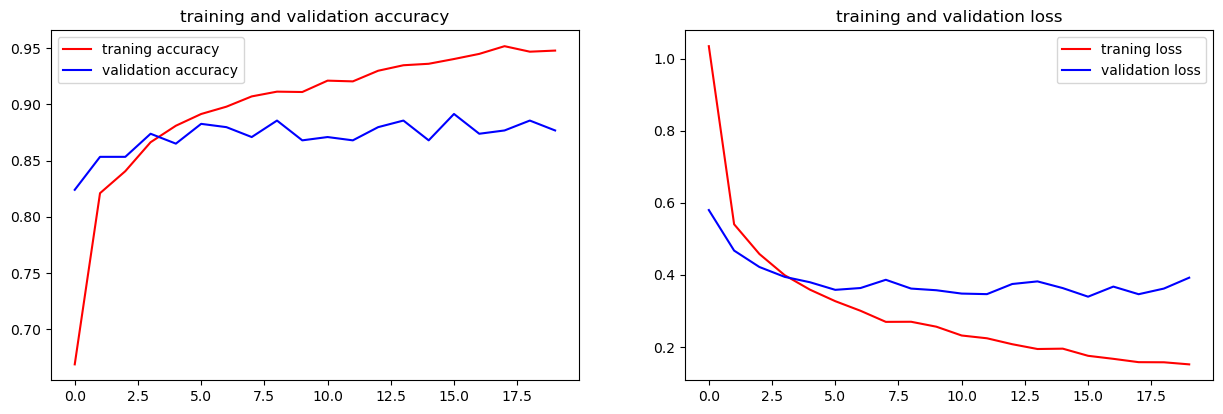

In [16]:
scores ={}
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(len(acc))
plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
plt.plot(epochs, acc, "r", label="traning accuracy")
plt.plot(epochs, val_acc, "b", label="validation accuracy")
plt.title(f"training and validation accuracy")
plt.legend(loc=0)
plt.subplot(2, 2, 2)
plt.plot(epochs, loss, "r", label="traning loss")
plt.plot(epochs, val_loss, "b", label="validation loss")
plt.title(f"training and validation loss")
plt.legend(loc=0)
plt.show()

In [17]:
model.evaluate(val_ds)

11/11 [==============================] - 7s 612ms/step - loss: 0.3955 - accuracy: 0.8768


[0.3955017328262329, 0.8768328428268433]

In [19]:
TEST_DIR = "/home/jovyan/workspace/clothing-dataset-small/test"
test_datagen = ImageDataGenerator(rescale = 1./255)
test_generator = test_datagen.flow_from_directory(
  TEST_DIR,
  target_size=(249,249),
  class_mode="categorical",
  batch_size=128)

Found 372 images belonging to 10 classes.


In [20]:
model.evaluate(test_generator)

3/3 [==============================] - 9s 2s/step - loss: 0.3403 - accuracy: 0.8898


[0.34027838706970215, 0.8897849321365356]

## Register Model on Huggingface

In [23]:
from huggingface_hub import push_to_hub_keras
from huggingface_hub import notebook_login
notebook_login()

In [24]:
push_to_hub_keras(model,
  "yusyel/clothing",
  include_optimizer = True,
  tags = ["fashion"],
log_dir = "/home/jovyan/workspace/logs/fit",

)

INFO:tensorflow:Assets written to: /tmp/tmpgnam4gq4/yusyel/clothing/assets


INFO:tensorflow:Assets written to: /tmp/tmpgnam4gq4/yusyel/clothing/assets


keras_metadata.pb:   0%|          | 0.00/482k [00:00<?, ?B/s]

events.out.tfevents.1691170563.w-yusye-fish-93c488524fe84e469abfb4db4d275806-848bc6cb78-bpfgc.10908.0.v2:   0%…

events.out.tfevents.1692636688.w-yusye-fish-93c488524fe84e469abfb4db4d275806-848bc6cb78-t6xqn.4421.2.v2:   0%|…

Upload 14 LFS files:   0%|          | 0/14 [00:00<?, ?it/s]

events.out.tfevents.1691050399.w-yusye-fish-93c488524fe84e469abfb4db4d275806-848bc6cb78-jxcvf.19964.0.v2:   0%…

events.out.tfevents.1692636434.w-yusye-fish-93c488524fe84e469abfb4db4d275806-848bc6cb78-t6xqn.4421.0.v2:   0%|…

events.out.tfevents.1692636743.w-yusye-fish-93c488524fe84e469abfb4db4d275806-848bc6cb78-t6xqn.4421.3.v2:   0%|…

events.out.tfevents.1692638677.w-yusye-fish-93c488524fe84e469abfb4db4d275806-848bc6cb78-6hkml.686.0.v2:   0%| …

events.out.tfevents.1691050454.w-yusye-fish-93c488524fe84e469abfb4db4d275806-848bc6cb78-jxcvf.19964.1.v2:   0%…

events.out.tfevents.1691170616.w-yusye-fish-93c488524fe84e469abfb4db4d275806-848bc6cb78-bpfgc.10908.1.v2:   0%…

events.out.tfevents.1692636503.w-yusye-fish-93c488524fe84e469abfb4db4d275806-848bc6cb78-t6xqn.4421.1.v2:   0%|…

events.out.tfevents.1692636808.w-yusye-fish-93c488524fe84e469abfb4db4d275806-848bc6cb78-t6xqn.4421.4.v2:   0%|…

events.out.tfevents.1692638746.w-yusye-fish-93c488524fe84e469abfb4db4d275806-848bc6cb78-6hkml.686.1.v2:   0%| …

saved_model.pb:   0%|          | 0.00/2.90M [00:00<?, ?B/s]

variables.data-00000-of-00001:   0%|          | 0.00/86.0M [00:00<?, ?B/s]

'https://huggingface.co/yusyel/clothing/tree/main/'